In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import os

In [2]:
# Takes in year and returns the last 2 digits that represent its year
# Examples:
# 2013 -> '13'
# 1999 -> '99'
# 2001 -> '01'
def get_last_year_digits(year):
    return str(year)[-2:]

In [3]:
# Create their respective folders if they're not there
if (not os.path.isdir('html-table')):
    os.mkdir('html-table')
if (not os.path.isdir('csv')):
    os.mkdir('csv')

In [4]:
# Extract HTML table of data from raw files
for year in range (1998, 2022 + 1):
    season_year_end = get_last_year_digits(year)
    season_year_start = get_last_year_digits(year - 1)
    
    team_stats_file = open(f'html-raw/{season_year_start}_{season_year_end}.html')
    team_stats_html = BeautifulSoup(team_stats_file)
    team_stats_table = team_stats_html.body.table
    team_stats_table_file = open(f'html-table/{season_year_start}_{season_year_end}.html', 'w')
    team_stats_table_file.write(str(team_stats_table))
    team_stats_table_file.close()

In [5]:
# Put the HTML table data into csv files
for year in range(1998, 2022 + 1):
    season_year_end = get_last_year_digits(year)
    season_year_start = get_last_year_digits(year - 1)
    
    table_file = open(f'html-table/{season_year_start}_{season_year_end}.html')
    table_html = BeautifulSoup(table_file)
    headers = []
    data = []
    for th in table_html.find('tr').find_all('th')[1:15]:
        headers.append(th.text.strip())
    # print(headers)
    for tr in table_html.find_all('tr')[1:]:
        row = []
        for td in tr.find_all('td')[1:]:
            row.append(td.text.strip())
        # print(row)
        data.append(row)
    df = pd.DataFrame(data, columns = headers)
    df['MIN'] = df['MIN'].str.replace(',', '') # Removes the comma that would ordinarily be in these values, pandas automatically corrects the type from str to int
    
    df.columns = df.columns.str.replace(' ', '')
    df.columns = df.columns.str.replace('\u00A0', '') # For whatever reason, the NBA's table uses a different unicode character from the regular "basic space"
    
    df.sort_values(by = 'WIN%', ascending = False)
    df.to_csv(f'csv/{season_year_start}_{season_year_end}.csv')

In [6]:
table = pd.read_csv('csv/21_22.csv', index_col=0)
calc_cols = ['eFG%', 'FTARate', 'TOV%', 'OREB%', 'OppeFG%', 'OppFTARate', 'OppTOV%', 'OppOREB%']
for col in calc_cols:
    mean = table[col].mean()
    std = table[col].std()
    new_col = 'Rel' + col
    table[new_col] = (table[col] - mean) / std # Technically, I'm calculating z-scores on a non-normal curve, but I don't care
# table.sort_values(by = 'TOV%', ascending = True)

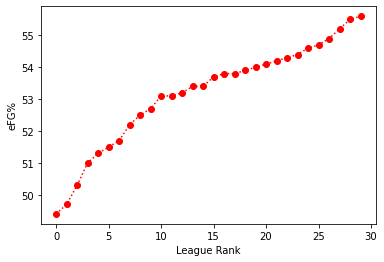

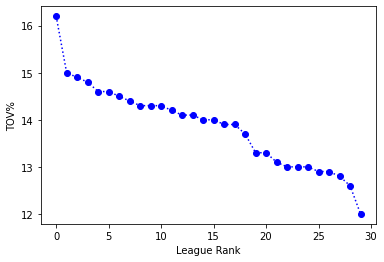

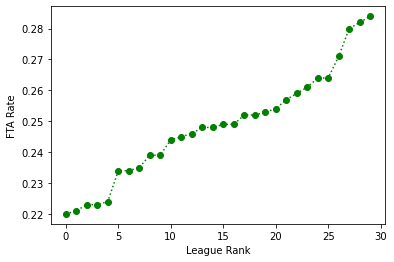

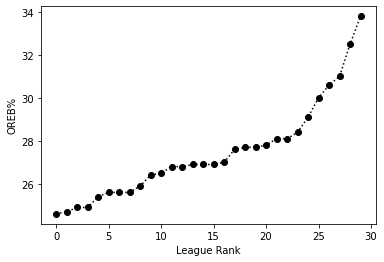

In [7]:
import matplotlib.pyplot as plt

xpoints = range(30)
efg_points = table['eFG%'].sort_values(ascending = True)
tov_points = table['TOV%'].sort_values(ascending = False)
fta_points = table['FTARate'].sort_values(ascending = True)
oreb_points = table['OREB%'].sort_values(ascending = True)
plt.plot(xpoints, efg_points, 'o:r')
plt.xlabel('League Rank')
plt.ylabel('eFG%')
plt.show()
plt.plot(xpoints, tov_points, 'o:b')
plt.xlabel('League Rank')
plt.ylabel('TOV%')
plt.show()
plt.plot(xpoints, fta_points, 'o:g')
plt.xlabel('League Rank')
plt.ylabel('FTA Rate')
plt.show()
plt.plot(xpoints, oreb_points, 'o:k')
plt.xlabel('League Rank')
plt.ylabel('OREB%')
plt.show()

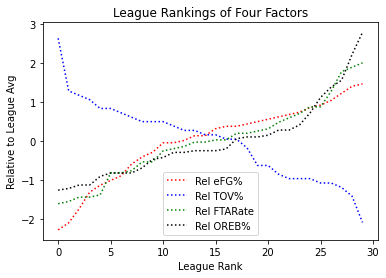

In [10]:
# red = eFG%
# blue = TOV%
# green = FTA Rate
# black = OREB%
rel_efg_points = table['ReleFG%'].sort_values(ascending = True)
rel_tov_points = table['RelTOV%'].sort_values(ascending = False) # I could potentially flip these values by multiplying them by -1, but I chose to leave them be
rel_fta_points = table['RelFTARate'].sort_values(ascending = True)
rel_oreb_points = table['RelOREB%'].sort_values(ascending = True)
plt.plot(xpoints, rel_efg_points, ':r', label = 'Rel eFG%')
plt.plot(xpoints, rel_tov_points, ':b', label = 'Rel TOV%')
plt.plot(xpoints, rel_fta_points, ':g', label = 'Rel FTARate')
plt.plot(xpoints, rel_oreb_points, ':k', label = 'Rel OREB%')
plt.title('League Rankings of Four Factors')
plt.xlabel('League Rank')
plt.ylabel('Relative to League Avg')
plt.legend()
plt.show()